## PCA, Swiss Army Knife of Data Wrangling

* In this post, we are going to look at how Principal Component Analysis can help us transform our feature matrix into Principal components, which can be used to reduce the number of features in the model and also uncorrelate features by understanding explained variance by each Principal Component (PC).


* In a few cases, PCA can be treated as a <b>transformation function </b>, where components can be used to better 'separate' the training data by mapping original feature matrix into a new basis (feature space), by maximizing <b> variance </b>, which helps separate classes.


* We need to keep in mind that PCA is not only used as a transformation, but most importantly helps understand inherent correlations, feature distributions and uses linear transformations, which provide us with a deeper understanding through visualizations. Let us start by loading Iris dataset (easy to understand and visualize), and later move ahead to a complex dataset.


* We also take a look at what Eigen values and vectors are, and how Eigen decomposition plays a role in PCA.

In [50]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set format to float
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# loading iris dataset
from sklearn.datasets import load_iris

dataset = load_iris()
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# store into dataframe df_iris
df_iris = pd.DataFrame(dataset.data)
df_iris.columns = dataset.feature_names
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = dataset.target

df_iris.head()

sepal_length  sepal_width  petal_length  petal_width  target
0          5.10         3.50          1.40         0.20       0
1          4.90         3.00          1.40         0.20       0
2          4.70         3.20          1.30         0.20       0
3          4.60         3.10          1.50         0.20       0
4          5.00         3.60          1.40         0.20       0

* Now, let us explore the dataset using scatter plot. There are 4 features to explore in the feature matrix. Sepal length and width, petal length and width.

* By plotting Sepal length vs Sepal Width, we can see that class 0 is separated lienarly. However, separating classes 1 and 2 is not possible. Looking at Petal length vs width in scatter plot, we see that all three classes can be separated with linear decision boundaries.

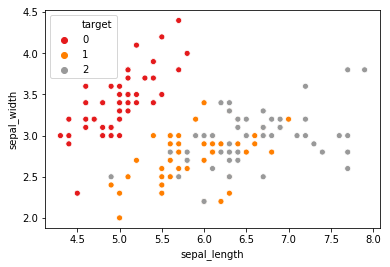

In [4]:
# Sepal length vs width: 
# Class 0 is clearly separable, but no class 1 and 2

sns.scatterplot(x=df_iris.sepal_length, y=df_iris.sepal_width, hue=df_iris.target, palette='Set1')

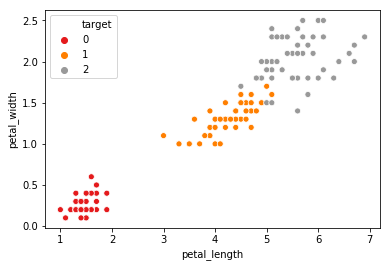

In [5]:
# Petal length vs width: 
# classes can be separated clearly (linearly separable) almost perfectly

sns.scatterplot(x=df_iris.petal_length, y=df_iris.petal_width, hue=df_iris.target, palette='Set1')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


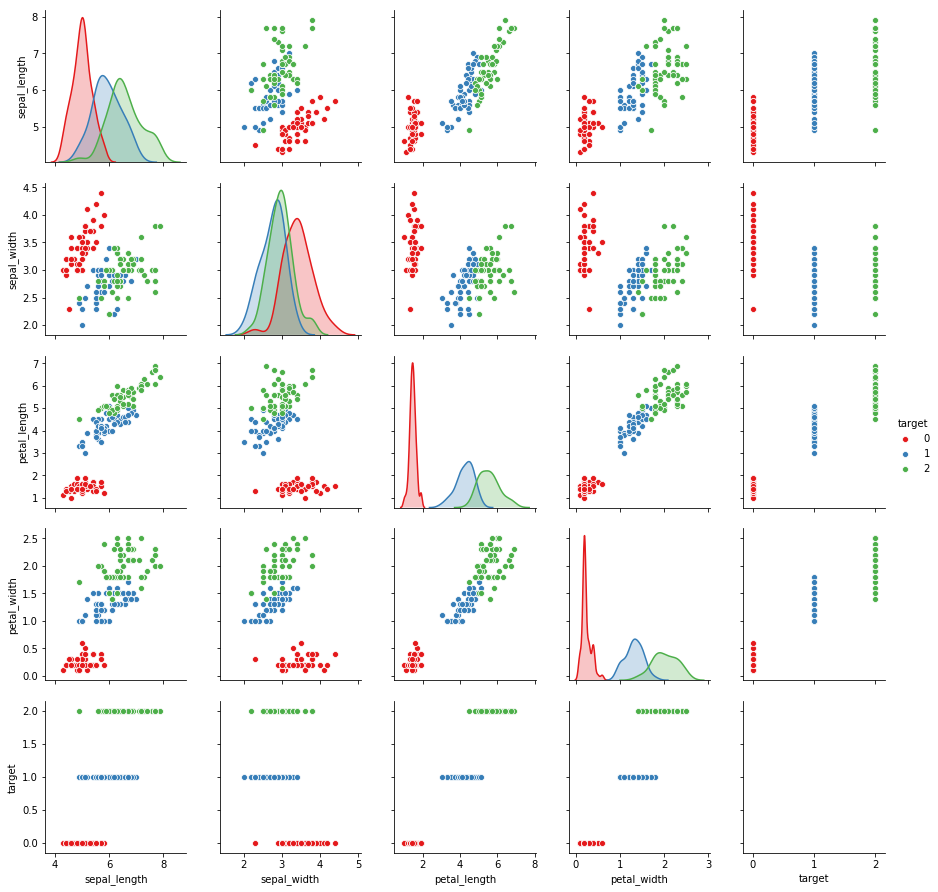

In [6]:
# we can use pairplot to look at all variables together

sns.pairplot(df_iris, hue='target', palette='Set1')

<hr>

## Eigen Everything

* Eigen values or vectors are one of those things which we read in almost any matrix math/ minimum, maximum optimization and so on. The way traditional math textbooks define Eigen attributes are unrecallable, due to non-intuitive explanations provided to the readers.


* Eigen vectors are essentially vectors, which when transformed by a matrix (changing basis), remain on the same span, which could either strecth or squish it (acting like a scalar). These vectors do not rotate, but only change in distance.


* For example, let us assume we have two unit vectors i, j on x and y axis respectively.

In [7]:
# function to plot vectors
def plotVec(D, title=''):

    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.grid()

    V = np.array(D)
    origin = [0], [0]
    if len(title) >= 1:
        plt.title(title)
    plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=10)
    plt.show()

### Unit Vectors 

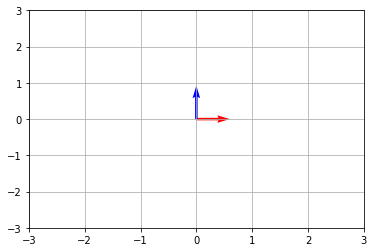

In [8]:
# unit vectors in x and y axes
plotVec([[1,0],[0,1]])

* Now, let us take a matrix A, which is essentially a linear transformation, and apply it to our basis vectors from above.

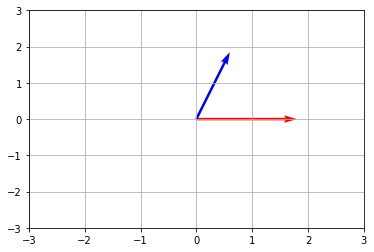

In [9]:
A = [[3,0], [1,2]]
# Plotting A
plotVec(A)

* Comparing the above two plots, we see that the red vector has a fixed span, that is along the x-axis, and can either stretch or shrink based on the scalar; however, the blue vector changes both distance and rotation. Essentially, the red vector scales by three times along the x-direction, and no transfomation on y-direction, as the transformation is [3,0].


* Hence, we could have more vectors in some unknown direction (which do not rotate, but only span), which we can find out. [-1,1] turns out to be another Eigen vector. Now, let us plot unit i and j vectors, along with [-1,1] vector on a plot.

### Units vectors + [-1,1] Vector 

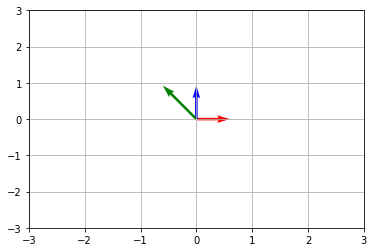

In [10]:
plotVec([[1,0],[0,1],[-1,1]])

* Now, we apply a linear transformation to the above points with the matrix A.

In [11]:
# Transformation Matrix

A = np.matrix(A)
A

matrix([[3, 0],
        [1, 2]])

In [12]:
# Original untrasnformed vectors (Red, Green, Blue)

Original_data = np.matrix([[1,0],[0,1],[-1,1]])
Original_data

matrix([[ 1,  0],
        [ 0,  1],
        [-1,  1]])

In [13]:
# Dot product of two matrixes

Transformed_data = Original_data.dot(A)
Transformed_data

matrix([[ 3,  0],
        [ 1,  2],
        [-2,  2]])

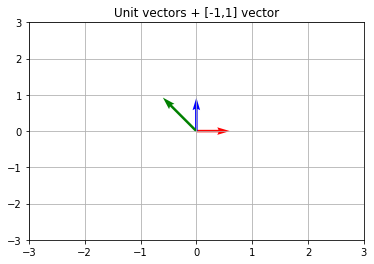

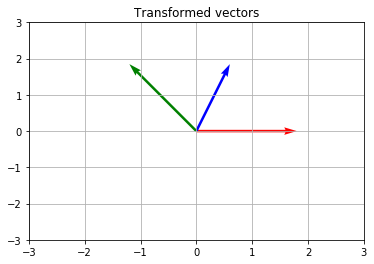

In [14]:
plotVec([[1,0],[0,1],[-1,1]], title='Unit vectors + [-1,1] vector')
plotVec(Transformed_data, title='Transformed vectors')

### The Eigens

* From the two plots above, the first plot shows unit vectors and [-1,1] vector, and the second plot shows trasnfomed vectors. We observe that the Red and Green vector (X axis unit vector) and [-1,1] which is now [-2,2], <b> Do Not Rotate </b>, but <b> Only Scale </b>. 


* Hence, the scalar multiplication factor is <b>2</b>, which is the Eigen value, and the vector [-1,1], is the <b> Eigen Vector </b>. Now that we understand what makes a vector or scalar 'Eigen', we can loook at the formal definition which we tried understanding in the first place.


* Given transformation matrix A, the product of matrix A and vector v is equal to Eigen value times the vector itself 

<strong>$${Av =\lambda v}$$ </strong>

In the above case, A is our transformation A [3, 0],[1, 2] and the Eigen vector is [-1,1], with scaling factor (Eigen value) of 2.

<hr>

# Example

### Standardization Step

* To understand variance between each variable, we <b> standardize </b> each feature (generally Z-score standardization), to bring its variance to 1.

* For Unsupervised algorithms, dimensionality reduction and so on, it is preferred to normalize or standardize our data to remove the effects of any variable having a large range, when compared to ariables which might have small range (Maximum - Minimum value).

In [15]:
# we use standardscalar for normalization

from sklearn.preprocessing import StandardScaler
X_norm = pd.DataFrame(StandardScaler().
                      fit_transform(df_iris[['sepal_length', 'sepal_width', 
                                             'petal_length', 'petal_width']]))

X_norm.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

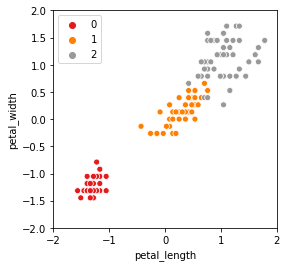

In [16]:
# plot of petal_length, petal_width after standadization

plt.figure(figsize=(4,4))
plt.xlim(-2,2)
plt.ylim(-2,2)
sns.scatterplot(x=X_norm.petal_length, y=X_norm.petal_width, 
                hue=dataset.target, palette='Set1')
plt.show()

### Covariance Step

* Covariance matrix captures covariance of two variables x,y in non-diagonal positions and captures variance across the same variable along diagonals, and is a symetric matrix. 

* Essentially, it captures the covariance, which is the joint variability of two random variables. A positive value denotes positive covariance (increase in x tends to increase in y),a dn negative covariance denotes inverse relation. 

In [17]:
# using numpys covariance method, we see that it is symetric

cov_mat = np.cov(X_norm.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

<hr>

### SVD:

* The current basis of the covariance matrix is still in the original 4 axis features space. Now, this covariance matrix can be decomposed into Eigen values and Eigen vectors, which maximize variance across each feature (or minimize mean squared error between principal component and the training data points).


SVD Concept:

 ${{Cov(X)V = \lambda V }}$ is the Eigen Decomposition, with Eigen values $\lambda$ and Eigen vector V

$${{Cov(X) = U D U^T}}$$

In [18]:
# For exmaple
A = np.matrix([[3,1],[1,3]])
D = np.matrix([[4,0],[0,2]])
A

matrix([[3, 1],
        [1, 3]])

* Matrix 'A' can be decomposed as $UDU^T$, where $UU^T = 1$ and D is a diagonal matrix with Eigen values along diagonals and zeroes elsewhere.

In [19]:
U = np.matrix([[np.sqrt(1/2), np.sqrt(1/2)], [np.sqrt(1/2), -np.sqrt(1/2)]])
U

matrix([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]])

In [20]:
print('U:', U, '\n\n')
print('U.T:', U.T, '\n\n')
print('D:', D)

U: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 


U.T: [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 


D: [[4 0]
 [0 2]]


* We know that $UU^T = 1$, let us verify

In [21]:
pd.DataFrame(U.dot(U.T))

0    1
0 1.00 0.00
1 0.00 1.00

In [22]:
D

matrix([[4, 0],
        [0, 2]])

</hr>

### Now, let us get back to our original problem

In [23]:
# decomposition into eigen values and vectors

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_vals.shape, eig_vecs.shape

((4,), (4, 4))

In [24]:
eig_vals, eig_vecs

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

### Explained Variance 

* We observe that the Eigen values are in decreasing order of values. Now, we convert them into percentages, by divind each eigen value by the sum of all eigen values.

In [25]:
explained_variance = [x/sum(eig_vals) for x in eig_vals]
explained_variance

[0.7296244541329985,
 0.2285076178670178,
 0.03668921889282875,
 0.005178709107154802]

In [26]:
eig_vals_percent = [x/sum(eig_vals) for x in eig_vals]

In [27]:
eig_vals_percent

[0.7296244541329985,
 0.2285076178670178,
 0.03668921889282875,
 0.005178709107154802]

* From the above plot, we can conclude that the first two principal components capture (95 %) of variance. If we were to have many number of dimensions (which this case does not), not all features actually contribut to the 95 % of explained variance, hence, only a few may be required.

* Given that this case is not complex, we are going to use all the four eigen vectors to project our normalized matrix to a new basis, which is the dot product of normalized feature matrix and eigen values.

In [28]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

# Theoretical Conclusion

### What after getting the Eigens ? 

* Essentially, we want to find a feature space/ new basis such that it maximizes the variance across each axis to find good deciison boundaries to classify the data.

* Along with this, we want to make sure we remove any correlations, or repetitive information, hence shifting to a new basis such that it minimizes the off-diagonal elements in our covariance matrix (essentially removing redundancy).

* Hence, we project X_norm by trasnforming it with the Eigen vectors, which land our data points into a new mapped space (which minimizes correlation between axes and maximizes variance).

### How do we test that the terms are no longer correlated ? 

* Yes, we compute the covariance of our newly projected feature matrix to verify our hypothesis.

In [29]:
# transforming to new basis

proj_X = X_norm.dot(eig_vecs)
df_pca = pd.DataFrame(proj_X)
df_pca.columns = ['PC1','PC2','PC3','PC4']
# df_pca['target'] = dataset.target

df_pca.head()

PC1   PC2   PC3   PC4
0 -2.26 -0.48 -0.13  0.02
1 -2.08  0.67 -0.23  0.10
2 -2.36  0.34  0.04  0.03
3 -2.30  0.60  0.09 -0.07
4 -2.39 -0.65  0.02 -0.04

### Covariance of new feature space

* We observe that the features achieve least correlation possible when trasnformed to new space, when compared to old feature matrixin the old space.

In [30]:
# covariance of new feature matrix
pd.DataFrame(np.cov(df_pca.T))

0     1     2    3
0  2.94 -0.00  0.00 0.00
1 -0.00  0.92 -0.00 0.00
2  0.00 -0.00  0.15 0.00
3  0.00  0.00  0.00 0.02

In [31]:
# covariance of old feature matrix
pd.DataFrame(np.cov(df_iris[['sepal_length','sepal_width','petal_length','petal_width']].T))

0     1     2     3
0  0.69 -0.04  1.27  0.52
1 -0.04  0.19 -0.33 -0.12
2  1.27 -0.33  3.12  1.30
3  0.52 -0.12  1.30  0.58

### Does PCA work (Visual confirmation) ? 

* Below, we plot scatterplots with PC1 vs PC2, PC1 vs PC3, PC2 vs PC3. As we move from higher variance to lower variance, from (PC1 vs PC2) to (PC1 vs PC3) to (PC2 vs PC3), we clearly observe the capability for linear decision boundaries to separate the classes. Just op 2 components are enough to explain 95 % of variance after transforming noemalized feature matrix into the new feature space.

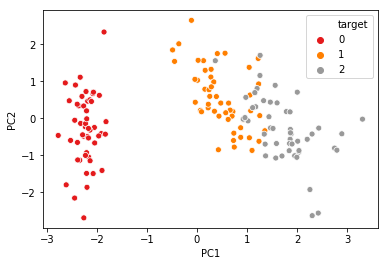

In [32]:
df_pca['target'] = dataset.target
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='target', palette='Set1')

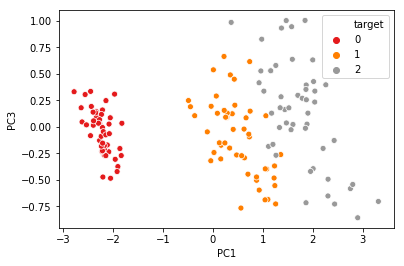

In [33]:
sns.scatterplot(x='PC1', y='PC3', data=df_pca, hue='target', palette='Set1')

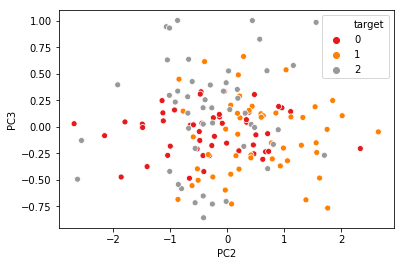

In [34]:
sns.scatterplot(x='PC2', y='PC3', data=df_pca, hue='target', palette='Set1')

* As expected, using PC3 vs PC4 becomes extremely tough for decision boundary to classify the three classes.

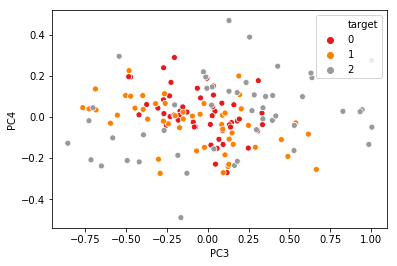

In [35]:
sns.scatterplot(x='PC3', y='PC4', data=df_pca, hue='target', palette='Set1')

### How effective is it ? 

* To recap, we standardized out original feature matrix. Later, we compute the covariance matrix of feature matrix. Then, we use Eigen decomposition to find out the eigen values and eigen vectors of covariance matrix of standardized feature matrix.


* Then, we deicide the number of components required/ number of dimensions required for our model, and multiply/ transform the normalized feature matrix into the new basis. Now, let us classify with and without using PCA with a Decision Tree Classifier.

In [36]:
# importing Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def DecisionTreeClf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return accuracy_score(y_test, y_pred)

def RandomForestClf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    clf = RandomForestClassifier(criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return accuracy_score(y_test, y_pred)
    
def LogisticRegClf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    clf = LogisticRegression()
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [37]:
# without PCA
DecisionTreeClf(df_iris, dataset.target)

1.0

In [38]:
# with PCA
DecisionTreeClf(df_pca, dataset.target)

1.0

<hr>

# Example 2:
## Breast Cancer Dataset Example 

In [39]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
df_cancer = pd.DataFrame(cancer_dataset['data'])
df_cancer.columns = cancer_dataset.feature_names
df_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80    1001.00             0.12   
1        20.57         17.77          132.90    1326.00             0.08   
2        19.69         21.25          130.00    1203.00             0.11   
3        11.42         20.38           77.58     386.10             0.14   
4        20.29         14.34          135.10    1297.00             0.10   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0              0.28            0.30                 0.15           0.24   
1              0.08            0.09                 0.07           0.18   
2              0.16            0.20                 0.13           0.21   
3              0.28            0.24                 0.11           0.26   
4              0.13            0.20                 0.10           0.18   

   mean fractal dimension           ...             worst radius  \
0                    0.08           ...                    25.38   
1                    0.06           ...                    24.99   
2                    0.06           ...                    23.57   
3                    0.10           ...                    14.91   
4                    0.06           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60     2019.00              0.16   
1          23.41           158.80     1956.00              0.12   
2          25.53           152.50     1709.00              0.14   
3          26.50            98.87      567.70              0.21   
4          16.67           152.20     1575.00              0.14   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0               0.67             0.71                  0.27            0.46   
1               0.19             0.24                  0.19            0.28   
2               0.42             0.45                  0.24            0.36   
3               0.87             0.69                  0.26            0.66   
4               0.20             0.40                  0.16            0.24   

   worst fractal dimension  
0                     0.12  
1                     0.09  
2                     0.09  
3                     0.17  
4                     0.08  

[5 rows x 30 columns]

### Standardization Step 

In [40]:
from sklearn.preprocessing import StandardScaler

X_norm = pd.DataFrame(StandardScaler().
                      fit_transform(df_cancer))

In [41]:
X_norm.head()

0     1     2     3     4     5     6    7     8     9   ...     20  \
0  1.10 -2.07  1.27  0.98  1.57  3.28  2.65 2.53  2.22  2.26  ...   1.89   
1  1.83 -0.35  1.69  1.91 -0.83 -0.49 -0.02 0.55  0.00 -0.87  ...   1.81   
2  1.58  0.46  1.57  1.56  0.94  1.05  1.36 2.04  0.94 -0.40  ...   1.51   
3 -0.77  0.25 -0.59 -0.76  3.28  3.40  1.92 1.45  2.87  4.91  ...  -0.28   
4  1.75 -1.15  1.78  1.83  0.28  0.54  1.37 1.43 -0.01 -0.56  ...   1.30   

     21    22    23    24    25    26   27    28    29  
0 -1.36  2.30  2.00  1.31  2.62  2.11 2.30  2.75  1.94  
1 -0.37  1.54  1.89 -0.38 -0.43 -0.15 1.09 -0.24  0.28  
2 -0.02  1.35  1.46  0.53  1.08  0.85 1.96  1.15  0.20  
3  0.13 -0.25 -0.55  3.39  3.89  1.99 2.18  6.05  4.94  
4 -1.47  1.34  1.22  0.22 -0.31  0.61 0.73 -0.87 -0.40  

[5 rows x 30 columns]

In [42]:
# importing PCA from scikit library

from sklearn.decomposition import PCA
pca = PCA(n_components=X_norm.shape[1]).fit(X_norm)

In [43]:
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

0.9515688143366666

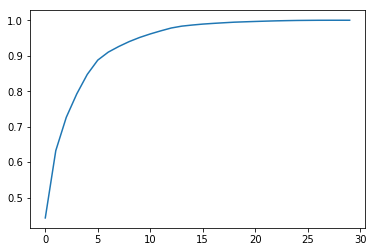

In [44]:
# Hence, we need the first 11 components of 30 components to explain around 95 % variance.

plt.plot(np.arange(0,len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

sum(pca.explained_variance_ratio_[:10])

### Transformation Step 

* Here, we use only <b>11 components of the 30 components available</b> to us, as 95 % of variance is explained by top 11 components put together.

* Now, let us check the top components and bottom components visually, to see the classes separate visually.

In [45]:
# Setting first 11 components, we fit and transform the standardized feature matrix

X_transformed = pd.DataFrame(PCA(n_components=11).fit_transform(X_norm))
X_transformed.columns = ['PC' + str(i+1) for i in range(0,X_transformed.shape[1])]

In [46]:
X_transformed.shape

(569, 11)

### Visualization:

* We see visually from PC1 vs PC2, that classes can be separated on these two axes. Moving ahead to PC2 vs PC3, we see that separation is not as clear. As we go to PC10 vs PC11, it becomes much harder to separate the classes.

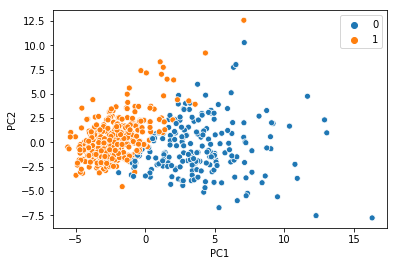

In [47]:
sns.scatterplot(X_transformed['PC1'], X_transformed['PC2'], hue=cancer_dataset.target)

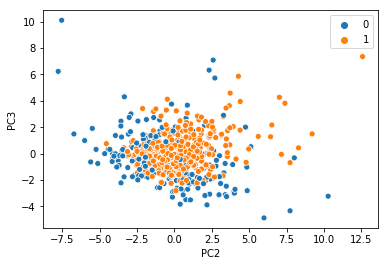

In [48]:
sns.scatterplot(X_transformed['PC2'], X_transformed['PC3'], hue=cancer_dataset.target)

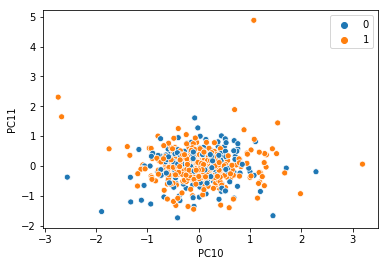

In [49]:
sns.scatterplot(X_transformed['PC10'], X_transformed['PC11'], hue=cancer_dataset.target)

### Hence, we can decide on the number of Components by explained variance, and also visually confirm as needed. Transformed feature matrix essentially reduces correlation, and can be used as a pre-processing technique to reduce number of dimensions by removing highly correlated variables.